In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# датаст взят с EDA (все вопросы предобработанны - лематизированны, токенизированны, удалены стоп-слова и.т.д)
df = pd.read_csv('questions_yana.csv', index_col=0)

In [137]:
df.shape

(245, 15)

In [138]:
df_q = df[['file', 'page', 'question', 'score', 'target', 'year', 'tokens_lemm']].copy()

In [139]:
df_q.rename(columns={'tokens_lemm': 'qst_processed'}, inplace=True)

In [140]:
from ast import literal_eval
df_q['qst_processed'] = df_q['qst_processed'].apply(lambda x: ' '.join(literal_eval(x)))

In [141]:
df_q['qst_len'] = df_q['qst_processed'].apply(len)

In [142]:
df_q.select_dtypes(include=[int, float]).corr()

,page,score,year,qst_len
page,1.000000,0.427520,-0.030012,0.182633
score,0.427520,1.000000,-0.056997,0.202051
year,-0.030012,-0.056997,1.000000,-0.057937
qst_len,0.182633,0.202051,-0.057937,1.000000


In [145]:
df_q = df_q.reset_index(drop=True)

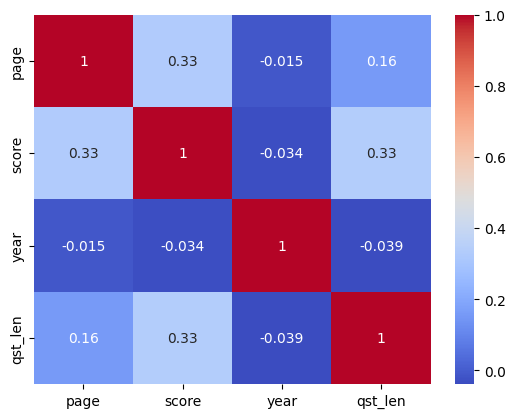

In [146]:
sns.heatmap(df_q.select_dtypes(include=[int, float]).corr(method='spearman'), cmap='coolwarm', annot=True)
plt.show()

# 1) TF-IDF + LogReg

In [193]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [194]:
vectorizer = TfidfVectorizer(stop_words='english')

In [195]:
tfidf_mtrx = vectorizer.fit_transform(df_q['qst_processed'])

In [196]:
tfidf_df = pd.DataFrame(tfidf_mtrx.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.columns = ['tfidf_' + col for col in tfidf_df.columns]

In [198]:
tfidf_df

,tfidf_000,tfidf_10,tfidf_120,tfidf_150,tfidf_2010,tfidf_2011,tfidf_2012,tfidf_2014,tfidf_2015,tfidf_2016,...,tfidf_woman,tfidf_work,tfidf_worker,tfidf_workforce,tfidf_world,tfidf_worldwide,tfidf_xbox,tfidf_yed,tfidf_young,tfidf_zack
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.418587,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.389386,0.0
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.555034,0.0,0.0,0.0,0.0,0.000000,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [199]:
df_vec = pd.concat([df_q, tfidf_df], axis=1)

In [200]:
df_vec = df_vec.drop(columns=[
    'file',
    'question',
    'qst_processed'
])

In [201]:
df_vec.head()

,page,score,target,year,qst_len,tfidf_000,tfidf_10,tfidf_120,tfidf_150,tfidf_2010,...,tfidf_woman,tfidf_work,tfidf_worker,tfidf_workforce,tfidf_world,tfidf_worldwide,tfidf_xbox,tfidf_yed,tfidf_young,tfidf_zack
0,2,2,marketing mix and strategy,2021,17,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,4,entrepreneurs and leaders,2021,51,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,6,the market,2021,52,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,8,entrepreneurs and leaders,2021,64,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,10,managing people,2021,70,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [202]:
encoder = LabelEncoder()
df_vec['encoded_target'] = encoder.fit_transform(df_vec['target'])

In [203]:
label_to_target = dict()
for _, row in df_vec[['target', 'encoded_target']].drop_duplicates().iterrows():
    label_to_target[row['encoded_target']] = row['target']

In [204]:
label_to_target

{3: 'marketing mix and strategy',
 1: 'entrepreneurs and leaders',
 5: 'the market',
 2: 'managing people',
 4: 'meeting customer needs',
 0: '?'}

In [205]:
df_vec = df_vec.drop(columns=['target'])

In [207]:
y = df_vec['encoded_target']
X = df_vec.drop(columns='encoded_target')

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [319]:
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.multiclass import OneVsRestClassifier

In [320]:
import warnings
warnings.filterwarnings("ignore")

In [359]:
log_reg = LogisticRegression(max_iter=10000)
param_grid = {
    'C': [100, 101, 102, 103, 104, 100.5],
    'solver': ['lbfgs', 'saga'],
    'multi_class': ['ovr', 'multinomial']
}
grid_search = GridSearchCV(estimator=log_reg,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                        #    verbose=1,
                           n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train, y_train)
print('Время обучения', time.time() - start_time)

/Users/macbook/Documents/maga_ai/year_project/AI-YP-24-16-9.-A-level-/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/macbook/Documents/maga_ai/year_project/AI-YP-24-16-9.-A-level-/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/macbook/Documents/maga_ai/year_project/AI-YP-24-16-9.-A-level-/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to

Время обучения 81.90131306648254


In [360]:
grid_search.best_estimator_

LogisticRegression(C=103, max_iter=10000, multi_class='ovr')

In [361]:
grid_search.best_score_

np.float64(0.7978978978978979)

In [362]:
multi_class = grid_search.best_estimator_.multi_class

In [363]:
train_pred = grid_search.predict(X_train)
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        73
           5       1.00      1.00      1.00        23

    accuracy                           1.00       183
   macro avg       1.00      1.00      1.00       183
weighted avg       1.00      1.00      1.00       183



In [364]:
test_pred = grid_search.predict(X_test)
test_proba = grid_search.predict_proba(X_test)
print(classification_report(y_test, test_pred))
print('ROC_AUC', roc_auc_score(y_test, test_proba, multi_class=multi_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.80      0.89         5
           2       0.83      0.50      0.62        10
           3       0.56      0.82      0.67        11
           4       0.68      0.81      0.74        21
           5       1.00      0.85      0.92        13

    accuracy                           0.74        62
   macro avg       0.68      0.63      0.64        62
weighted avg       0.75      0.74      0.73        62

ROC_AUC 0.9433145416902335


In [366]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [379]:
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5, scoring='roc_auc_ovr')
print('roc_auc_cross_val_scores =', *cv_scores)

roc_auc_cross_val_scores = nan 0.9524712418145599 0.9531462884660559 0.8005108346051192 0.9662012173290369


# 2) N-Grams + Naive bayes 

In [380]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [389]:
df_q.head()

,file,page,question,score,target,year,qst_processed,qst_len
0,Question Paper - Unit 1 (WBS11) - January 2021...,2,Define the term ‘brand’ .,2,marketing mix and strategy,2021,define term brand,17
1,Question Paper - Unit 1 (WBS11) - January 2021...,2,Explain one risk Jack Ma may have taken when s...,4,entrepreneurs and leaders,2021,explain one risk jack ma may take set alibaba ...,51
2,Question Paper - Unit 1 (WBS11) - January 2021...,3,Analyse two factors that may have increased de...,6,the market,2021,analyse two factor may increase demand alibaba...,52
3,Question Paper - Unit 1 (WBS11) - January 2021...,4,Discuss if profit maximisation is the main bus...,8,entrepreneurs and leaders,2021,discus profit maximisation main business objec...,64
4,Question Paper - Unit 1 (WBS11) - January 2021...,5,Assess the advantages of a paternalistic style...,10,managing people,2021,assess advantage paternalistic style leadershi...,70


In [391]:
encoder = LabelEncoder()
y = encoder.fit_transform(df_q['target'])
X = df_q.drop(columns=['file', 'question', 'target'])

In [392]:
X.columns

Index(['page', 'score', 'year', 'qst_processed', 'qst_len'], dtype='object')

In [393]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [395]:
X_train.head()

,page,score,year,qst_processed,qst_len
182,4,6,2022,analyse two entrepreneurial motif nguyen thi p...,78
226,3,2,2020,what mean business business b2b market,38
68,18,8,2022,assess benefit aldi sponsor uk olympic team,43
104,2,4,2023,explain data likely affect revenue retailer,43
69,19,10,2022,assess likely impact price comparison website ...,60


In [466]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import make_scorer

def drop_text_column(X):
    return X.drop(columns=['qst_processed'])


pipeline = Pipeline([
    ('tfidf', ColumnTransformer(
        transformers=[
            ('tfidf', TfidfVectorizer(), 'qst_processed')
        ],
        remainder='passthrough'
    )),
    # ('drop_question', FunctionTransformer(drop_text_column, validate=False)),
    ('nb', MultinomialNB())
])

param_grid = {
    'tfidf__tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tfidf__tfidf__min_df': [1, 2],
    'nb__alpha': [0.1, 0.01, 0.05, 1e-5, 1e-2, 1e-3, 1e-4, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-12]
}

In [467]:
gs_bayes = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
start_time = time.time()
gs_bayes.fit(X_train, y_train)
print('Время обучения', time.time() - start_time)

Fitting 5 folds for each of 78 candidates, totalling 390 fits
Время обучения 1.9334368705749512


In [548]:
gs_bayes.best_estimator_

Pipeline(steps=[('tfidf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tfidf',
                                                  TfidfVectorizer(ngram_range=(1,
                                                                               2)),
                                                  'qst_processed')])),
                ('nb', MultinomialNB(alpha=1e-10))])

In [470]:
gs_bayes.best_score_

np.float64(0.6722222222222223)

In [489]:
from sklearn.preprocessing import label_binarize

In [492]:
y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5])

In [493]:
pred_train = gs_bayes.predict(X_train)
pred_train_proba = gs_bayes.predict_proba(X_train)
print(classification_report(y_train, pred_train))
print(roc_auc_score(y_train_bin, pred_train_proba))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        23
           3       0.96      1.00      0.98        46
           4       1.00      0.99      0.99        73
           5       1.00      0.96      0.98        23

    accuracy                           0.99       183
   macro avg       0.99      0.99      0.99       183
weighted avg       0.99      0.99      0.99       183

1.0


In [498]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
pred_test_prob = gs_bayes.predict_proba(X_test)
pred_test = gs_bayes.predict(X_test)
print(classification_report(y_test, pred_test))
print('roc_auc = ', roc_auc_score(y_test_bin, pred_test_prob))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.60      0.55         5
           2       0.40      0.20      0.27        10
           3       0.45      0.82      0.58        11
           4       0.67      0.57      0.62        21
           5       0.77      0.77      0.77        13

    accuracy                           0.58        62
   macro avg       0.46      0.49      0.46        62
weighted avg       0.57      0.58      0.56        62

roc_auc =  0.9097579864583457


In [506]:
y_bin = label_binarize(y, classes=[0, 1, 2, 3, 4, 5])

In [549]:
def custom_roc_auc_bayes(bayes, X, y):
    y_bin = label_binarize(y, classes=[0, 1, 2, 3, 4, 5])
    y_scores = bayes.predict_proba(X)
    return roc_auc_score(y_bin, y_scores)

In [554]:
cv_score_nb = cross_val_score(gs_bayes.best_estimator_, X, y, cv=5, scoring=custom_roc_auc_bayes)

In [555]:
cv_score_nb

array([       nan, 0.88471254, 0.8988927 , 0.80366126, 0.92333422])

# 3) TF-IDF + SVM

In [529]:
from sklearn.svm import LinearSVC

In [530]:
encoder = LabelEncoder()
y = encoder.fit_transform(df_q['target'])
X = df_q.drop(columns=['file', 'question', 'target'])

In [531]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [533]:
pipeline = Pipeline([
    ('tfidf', ColumnTransformer(
        transformers=[
            ('tfidf', TfidfVectorizer(), 'qst_processed')
        ],
        remainder='passthrough'
    )),
    # ('drop_question', FunctionTransformer(drop_text_column, validate=False)),
    ('svm', LinearSVC(max_iter=1000))
])
param_grid = {
    'tfidf__tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tfidf__tfidf__min_df': [1, 2],
    'svm__C': [0.1, 0.01, 0.05, 1e-5, 1e-2, 1e-3, 1e-4, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-12]
}

In [534]:
gs_svm = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
start_time = time.time()
gs_svm.fit(X_train, y_train)
print('Время обучения', time.time() - start_time)

Fitting 5 folds for each of 78 candidates, totalling 390 fits
Время обучения 7.188220977783203


In [535]:
gs_svm.best_params_

{'svm__C': 1e-05,
 'tfidf__tfidf__min_df': 1,
 'tfidf__tfidf__ngram_range': (1, 1)}

In [536]:
gs_svm.best_score_

np.float64(0.39894894894894894)

In [540]:
y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5])
pred_test_scores = gs_svm.best_estimator_.decision_function(X_train)
pred_train = gs_svm.best_estimator_.predict(X_train)
print(classification_report(y_train, pred_train))
print('roc_auc = ', roc_auc_score(y_train_bin, pred_test_scores))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        46
           4       0.40      1.00      0.57        73
           5       0.00      0.00      0.00        23

    accuracy                           0.40       183
   macro avg       0.07      0.17      0.10       183
weighted avg       0.16      0.40      0.23       183

roc_auc =  0.6706465078249505


In [541]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
pred_test_scores = gs_svm.best_estimator_.decision_function(X_test)
pred_test = gs_svm.best_estimator_.predict(X_test)
print(classification_report(y_test, pred_test))
print('roc_auc = ', roc_auc_score(y_test_bin, pred_test_scores))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        11
           4       0.33      0.95      0.49        21
           5       0.50      0.08      0.13        13

    accuracy                           0.34        62
   macro avg       0.14      0.17      0.10        62
weighted avg       0.22      0.34      0.20        62

roc_auc =  0.6221922254992286


In [546]:
def custom_roc_auc_scorer_svm(svm, X, y):
    y_bin = label_binarize(y, classes=[0, 1, 2, 3, 4, 5])
    y_scores = svm.decision_function(X)
    return roc_auc_score(y_bin, y_scores)

In [547]:
cross_val_score(gs_svm.best_estimator_, X, y, cv=10, scoring=custom_roc_auc_scorer_svm)

array([       nan, 0.76499415, 0.59672653, 0.60325526, 0.6227882 ,
              nan,        nan,        nan,        nan,        nan])

# 4) Случайное предсказание

In [556]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

In [557]:
class RandomClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, threshold=0.5):
        self.threshold = threshold

    def fit(self, X, y):
        self.classes = np.unique(y)
        return self

    def predict(self, X):
        n_samples = X.shape[0]
        return np.random.choice(self.classes, size=n_samples)
    
    def predict_proba(self, X):
        n_samples = X.shape[0]
        n_classes = len(self.classes)
        random_probas = np.random.rand(n_samples, n_classes)
        random_probas /= random_probas.sum(axis=1, keepdims=True)
        return random_probas
    
    def score(self, X, y):
        return np.mean(self.predict(X) == y)


In [558]:
encoder = LabelEncoder()
y = encoder.fit_transform(df_q['target'])
X = df_q.drop(columns=['file', 'question', 'target'])

In [559]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [560]:
rand_class = RandomClassifier()
rand_class.fit(X_train, y_train)

RandomClassifier()

In [562]:
pred_train = rand_class.predict(X_train)
y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5])
pred_test_scores = rand_class.predict_proba(X_train)
pred_train = rand_class.predict(X_train)
print(classification_report(y_train, pred_train))
print('roc_auc = ', roc_auc_score(y_train_bin, pred_test_scores))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.07      0.12      0.09        16
           2       0.14      0.17      0.16        23
           3       0.23      0.15      0.18        46
           4       0.34      0.16      0.22        73
           5       0.10      0.13      0.11        23

    accuracy                           0.15       183
   macro avg       0.15      0.12      0.13       183
weighted avg       0.23      0.15      0.18       183

roc_auc =  0.4881431787477131
